In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
import sys
sys.path.append('../src')

In [4]:
from d00_utils.db_utils import dbReadWriteViews
io_views = dbReadWriteViews()

/home/ubuntu/anaconda3/envs/usal_echo/lib/python3.6/site-packages/psycopg2/__init__.py:144: UserWarning: The psycopg2 wheel package will be renamed from release 2.8; in order to keep installing from binary please use "pip install psycopg2-binary" instead. For details see: <http://initd.org/psycopg/docs/install.html#binary-install-from-pypi>.
  """)


In [5]:
io_views.list_tables()

['machines_all_bmi', 'instances_with_labels_scrappy100', 'machines_new_bmi', 'instances_unlabeled', 'frames_sorted_by_views_temp', 'frames_w_labels', 'instances_unique_master_list', 'instances_w_labels_train', 'instances_w_conflicts', 'instances_w_labels_test', 'instances_w_labels', 'instances_w_labels_train_downsampleby5', 'instances_w_labels_test_downsampleby5', 'chords_by_volume_mask', 'frames_by_volume_mask']


In [6]:
from d04_segmentation.generate_masks import generate_masks, get_mask

In [7]:
df = generate_masks()

1 seconds to group 24297 rows
9 seconds to apply 1157 rows


In [8]:
df.head()

,instanceidk,indexinmglist,x1coordinate,y1coordinate,x2coordinate,y2coordinate,chamber,frame,filename,lines,points,mask
0,779540,0,"[485.0, 480.90687919463096, 440.86949019132993...","[380.0, 381.66359060402704, 384.966698958586, ...","[396.0, 522.358037931813, 521.074113795439, 51...","[162.0, 364.740869835177, 352.222609505532, 33...",la,51,1LHFYKEZ,"[((485.0, 380.0), (396.0, 162.0)), ((480.90687...","[(485.0, 380.0), (480.90687919463096, 381.6635...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,..."
1,779540,1,"[452.0, 421.94456521739096, 419.746739130435, ...","[349.0, 351.796739130435, 343.73804347826103, ...","[425.0, 482.456227436823, 483.36868231046896, ...","[187.0, 341.711462093863, 333.134386281588, 32...",la,68,1LHFYKEZ,"[((452.0, 349.0), (425.0, 187.0)), ((421.94456...","[(452.0, 349.0), (421.94456521739096, 351.7967...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,..."
2,841585,0,"[437.0, 448.47381422924894, 384.99446280991697...","[416.0, 416.231027667984, 413.267314049587, 40...","[402.0, 491.178705211726, 503.536115635179, 51...","[181.0, 409.8707247557, 395.612174267101, 381....",la,46,7SQZPLEJ,"[((437.0, 416.0), (402.0, 181.0)), ((448.47381...","[(437.0, 416.0), (448.47381422924894, 416.2310...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,..."
3,841585,1,"[414.0, 366.31768953068604, 360.64635761589403...","[405.0, 405.098916967509, 393.292715231788, 38...","[417.0, 412.328293736501, 461.257577036724, 46...","[177.0, 405.70431965442805, 394.616547066273, ...",la,60,7SQZPLEJ,"[((414.0, 405.0), (417.0, 177.0)), ((366.31768...","[(414.0, 405.0), (366.31768953068604, 405.0989...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,..."
4,921901,0,"[508.0, 523.506117397454, 484.518352192362, 44...","[369.0, 365.96646039603996, 371.899381188119, ...","[417.0, 546.086449022875, 552.259347068626, 55...","[175.0, 355.37465535524905, 340.123966065748, ...",la,51,EAKXA40T,"[((508.0, 369.0), (417.0, 175.0)), ((523.50611...","[(508.0, 369.0), (523.506117397454, 365.966460...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,..."


In [9]:
import os
os.makedirs('masks', exist_ok=True)

In [10]:
for i, row in df.iterrows():
    filename = row['filename']
    frame = row['frame']
    chamber = row['chamber']
    np.save(f"masks/a_{filename}.dcm_{frame}_{chamber}_gt.npy", row['mask'])

In [11]:
x = df.iloc[0]
lines = x['lines']
lines

[((485.0, 380.0), (396.0, 162.0)),
 ((480.90687919463096, 381.66359060402704),
  (522.358037931813, 364.740869835177)),
 ((440.86949019132993, 384.966698958586),
  (521.074113795439, 352.222609505532)),
 ((429.163205376604, 376.703439089368), (519.790189659065, 339.704349175886)),
 ((417.456920561879, 368.44017922015), (518.5062655226909, 327.186088846241)),
 ((414.154231775845, 356.746093449311), (517.222341386317, 314.667828516595)),
 ((414.373094834886, 343.614309906859), (515.938417249944, 302.14956818695)),
 ((414.591957893927, 330.482526364406), (513.929243991481, 289.927395801643)),
 ((414.810820952967, 317.350742821954),
  (509.95025098874396, 278.509415880742)),
 ((414.81752349084, 304.305575272088), (505.971257986005, 267.091435959842)),
 ((413.472106739674, 291.812419725546), (501.992264983267, 255.673456038941)),
 ((412.126689988508, 279.319264179004), (498.013271980529, 244.255476118041)),
 ((410.781273237342, 266.826108632461), (494.03427897779096, 232.83749619714)),
 ((4

In [12]:
points = x['points']
points

[(485.0, 380.0),
 (480.90687919463096, 381.66359060402704),
 (440.86949019132993, 384.966698958586),
 (429.163205376604, 376.703439089368),
 (417.456920561879, 368.44017922015),
 (414.154231775845, 356.746093449311),
 (414.373094834886, 343.614309906859),
 (414.591957893927, 330.482526364406),
 (414.810820952967, 317.350742821954),
 (414.81752349084, 304.305575272088),
 (413.472106739674, 291.812419725546),
 (412.126689988508, 279.319264179004),
 (410.781273237342, 266.826108632461),
 (409.435856486176, 254.332953085919),
 (408.09043973501, 241.83979753937697),
 (403.816837539432, 230.54209384857998),
 (399.33221608832804, 219.33054022082),
 (394.84759463722395, 208.11898659306),
 (390.36297318612, 196.9074329653),
 (392.279550741495, 183.08254579819697),
 (394.759850247165, 169.027515266066),
 (396.0, 162.0),
 (405.207415803109, 164.762224740933),
 (423.622247409326, 170.286674222798),
 (442.03707901554395, 175.811123704663),
 (452.84562158196604, 184.440893023876),
 (461.568410697612

In [13]:
from shapely.geometry import MultiLineString, Polygon

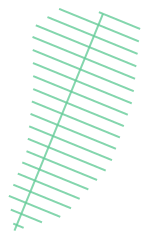

In [14]:
MultiLineString(lines)

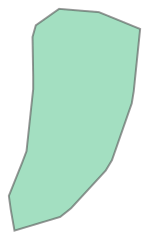

In [15]:
Polygon(points)

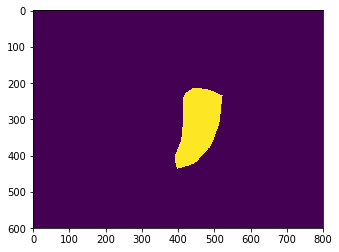

In [16]:
plt.imshow(np.flipud(x['mask']))